In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss
import seaborn as sn
import pandas as pd

weights = np.array([10, 15, 20, 21, 35, 39, 51, 58, 101, 110, 125, 149, 201, 220, 225]).reshape(15,1)
is_horse = np.array([0,0,0,1,0,1,1,0,0,1,1,0,1,1,1])

model = LogisticRegression(solver='lbfgs').fit(weights, is_horse)

print(model.intercept_, model.coef_)

def logit(weight):
    B0 = model.intercept_[0]
    B1 = model.coef_[0][0]
    return B0 + B1 * weight

def sigmoid(x):
    return 1 / (1 + (np.exp(- logit(x))))

logodds = logit(10)
print(logodds)

p = sigmoid(10)
print(p)

[-1.16900597] [[0.01525125]]
-1.0164934541913047
0.26571099569135126


In [7]:
# what is the log odds if p = 0.26?
np.log(p/(1-p))

-1.0164934541913047

In [14]:
(sigmoid(weights) > 0.5).astype('uint8').reshape(15)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [15]:
# take these probabilities above and turn into 0 or 1 if not horse or horse and make a vector ^^^^^

In [16]:
model.predict(weights)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [18]:
model.predict_proba(weights)[:,1]

array([0.265711  , 0.28085243, 0.29650828, 0.2996994 , 0.34632964,
       0.36026661, 0.40343035, 0.42936721, 0.59179008, 0.62448565,
       0.67642714, 0.75090232, 0.86949438, 0.8990097 , 0.9057255 ])

In [20]:
# for log of probabilities:
np.log(model.predict_proba(weights)[:,1])
# OR 
model.predict_log_proba(weights)[:,1]

array([-1.32534604, -1.2699259 , -1.21568012, -1.2049753 , -1.06036425,
       -1.02091093, -0.90775143, -0.84544276, -0.5246033 , -0.47082692,
       -0.39093053, -0.2864797 , -0.13984341, -0.10646146, -0.09901899])

In [21]:
model.classes_

array([0, 1])

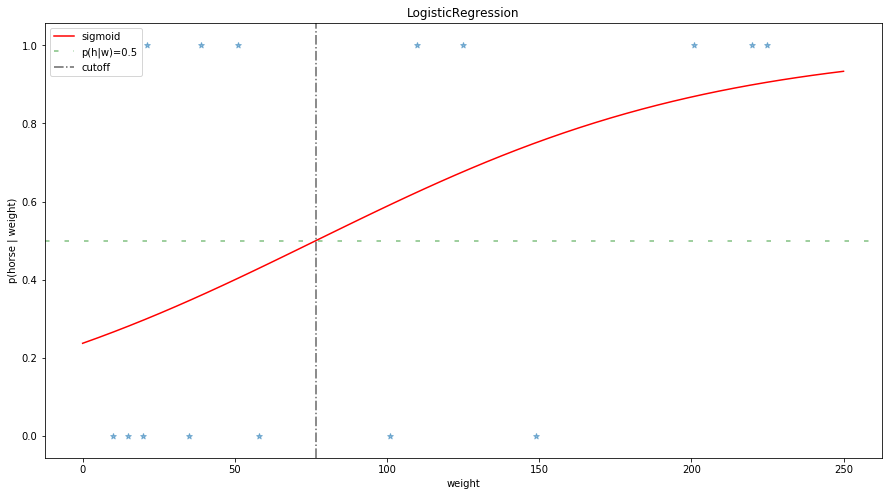

In [50]:
xs = np.linspace(0,250)
midpoint = (np.log(0.5/(1-0.5))) - (model.intercept_[0]) / (model.coef_[0][0])

plt.figure(figsize=(15,8))
plt.scatter(weights, is_horse, marker='*',alpha=0.5)
plt.plot(xs, model.predict_proba(xs.reshape(50,1))[:,1], label='sigmoid', color='r')

plt.axhline(0.5, color='g', alpha=0.5, linestyle='--', dashes=(3,10), label='p(h|w)=0.5')
plt.axvline(midpoint, color='k', alpha=0.6, linestyle='-.', label='cutoff')

plt.xlabel('weight')
plt.ylabel('p(horse | weight)')
plt.legend()
plt.title('LogisticRegression')
plt.show()

In [48]:
# calculate the weight when p=0.5 - exactly

In [47]:
midpoint = (np.log(0.5/(1-0.5))) - (model.intercept_[0]) / (model.coef_[0][0])
midpoint

76.64983952663589

f# metrics

In [51]:
y = is_horse
y_hat = model.predict(weights)
p_hat = model.predict_proba(weights)[:,1]

In [52]:
y

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [53]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [54]:
p_hat

array([0.265711  , 0.28085243, 0.29650828, 0.2996994 , 0.34632964,
       0.36026661, 0.40343035, 0.42936721, 0.59179008, 0.62448565,
       0.67642714, 0.75090232, 0.86949438, 0.8990097 , 0.9057255 ])

In [55]:
log_loss(y, p_hat)

0.5735336539213267

In [56]:
# show a vector of True/False where the prediction was correct or not

In [58]:
y == y_hat # filter this list into 2 lists - negative and positive predictions

array([ True,  True,  True, False,  True, False, False,  True, False,
        True,  True, False,  True,  True,  True])

In [67]:
pred_neg = (y == y_hat)[p_hat > 0.5]
pred_pos = (y == y_hat)[p_hat < 0.5]

In [68]:
pred_neg

array([False,  True,  True, False,  True,  True,  True])

In [69]:
pred_pos

array([ True,  True,  True, False,  True, False, False,  True])

In [71]:
# create variables for TN, FN, TP, FP... counts of each

In [85]:
TN, FN = pred_neg.sum(), (~pred_neg).sum()
TP, FP = pred_pos.sum(), (~pred_pos).sum()
TN, FN, TP, FP

AttributeError: 'int' object has no attribute 'sum'

In [90]:
cm = confusion_matrix(y, y_hat)
cm

array([[5, 2],
       [3, 5]], dtype=int64)

In [83]:
# compute accuracy using above numbers

In [86]:
accuracy_score(y, y_hat)

0.6666666666666666

In [87]:
precision_score(y, y_hat)

0.7142857142857143

In [88]:
# compute recall

In [89]:
recall_score(y, y_hat)

0.625

In [91]:
cmdf = pd.DataFrame(cm, index=['Predict Dog','Predict Horse'], columns=['Actual Dog', 'Actual Horse'])

In [92]:
cmdf

,Actual Dog,Actual Horse
Predict Dog,5,2
Predict Horse,3,5


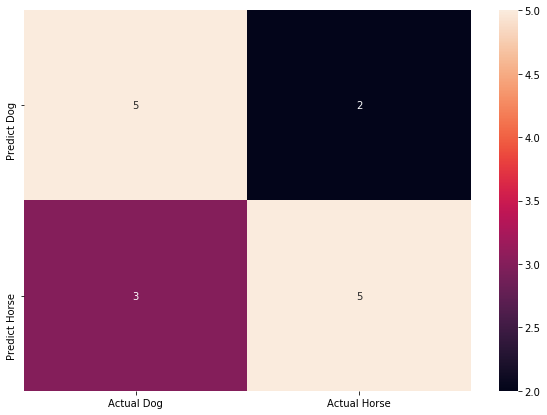

In [93]:
plt.figure(figsize = (10,7))
sn.heatmap(cmdf, annot=True)
plt.show()

In [99]:
auc = roc_auc_score(y, p_hat)

In [100]:
fpr, tpr, thr = roc_curve(y, p_hat)

In [101]:
for th, fp, tp in zip(thr, fpr, tpr):
   print("{0:.2f} {1:.2f} {2:.2f}".format(th, fp, tp))

1.91 0.00 0.00
0.91 0.00 0.12
0.87 0.00 0.38
0.75 0.14 0.38
0.62 0.14 0.62
0.43 0.43 0.62
0.36 0.43 0.88
0.35 0.57 0.88
0.30 0.57 1.00
0.27 1.00 1.00


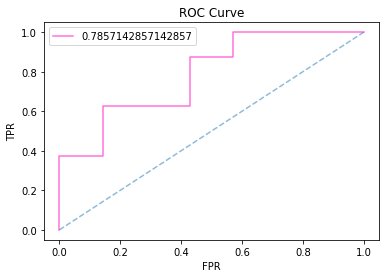

In [102]:
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()